In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import folium
#import eli5 # Feature importance evaluation
# 机器学习
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification


from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
#from collections import Counter
#from sklearn.model_selection import KFold, StratifiedKFold
#import warnings
#warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,precision_recall_fscore_support

In [2]:
# 导入库文件
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据
data_origin = pd.read_csv("/home/aistudio/data/data227712/hotel_bookings.csv")
data_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
# 保留副本
data = data_origin.copy()
missing=data.isnull().sum(axis=0)
missing[missing!=0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [4]:
#缺失值处理
data.children.fillna(data.children.mode()[0],inplace=True)
data.dropna(subset=['country'],inplace=True)
#data.country.fillna(data.country.mode()[0],inplace=True)
data.agent.fillna(0, inplace=True)
data.drop('company',inplace=True, axis=1)

In [5]:
# 异常值处理
# 入住人数为0
zero_guest=data[data[['adults', 'children', 'babies']].sum(axis=1)==0]
data.drop(zero_guest.index, inplace=True)

# 入住天数为0
zero_days = data[data[['stays_in_weekend_nights',
                       'stays_in_week_nights']].sum(axis=1) == 0]
data.drop(zero_days.index, inplace=True)

# 餐食类型Undefined/SC合并
data.meal.replace("Undefined", "SC", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118092 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118092 non-null  object 
 1   is_canceled                     118092 non-null  int64  
 2   lead_time                       118092 non-null  int64  
 3   arrival_date_year               118092 non-null  int64  
 4   arrival_date_month              118092 non-null  object 
 5   arrival_date_week_number        118092 non-null  int64  
 6   arrival_date_day_of_month       118092 non-null  int64  
 7   stays_in_weekend_nights         118092 non-null  int64  
 8   stays_in_week_nights            118092 non-null  int64  
 9   adults                          118092 non-null  int64  
 10  children                        118092 non-null  float64
 11  babies                          118092 non-null  int64  
 12  meal            

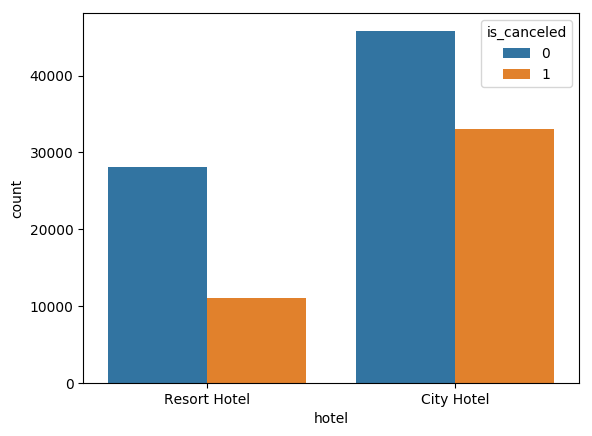

In [6]:
# 查看酒店类型与取消预定的关系
import seaborn as sns
sns.countplot(x='hotel', hue='is_canceled', data=data)
plt.show()

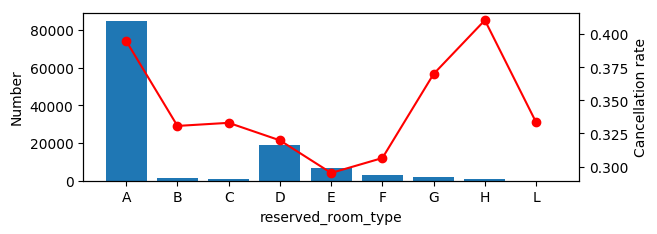

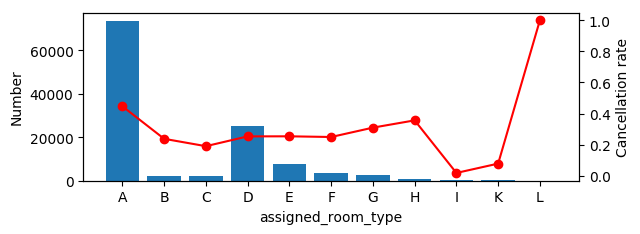

In [7]:
# 查看房间类型与取消预订的关系
index = 1
for room_type in ['reserved_room_type', 'assigned_room_type']:
    # plt.figure(figsize=(6,8))
    ax1 = plt.subplot(2, 1, index)
    index += 1
    ax2 = ax1.twinx()
    ax1.bar(
        data.groupby(room_type).size().index,
        data.groupby(room_type).size())
    ax1.set_xlabel(room_type)
    ax1.set_ylabel('Number')
    ax2.plot(
        data.groupby(room_type)['is_canceled'].mean(), 'ro-')
    ax2.set_ylabel('Cancellation rate')
    plt.show()


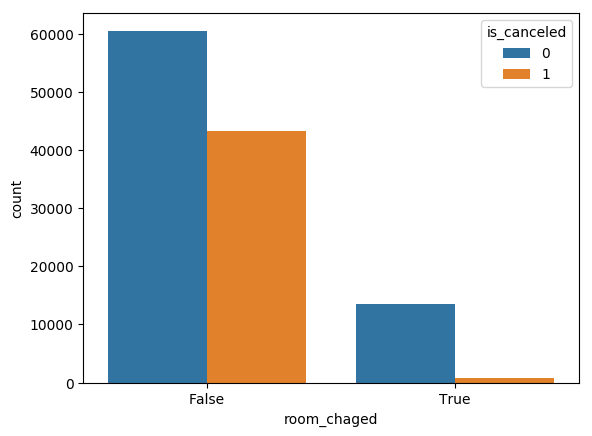

In [8]:
# 房间类型变更对取消预定的影响
data['room_chaged']=data['reserved_room_type']!=data['assigned_room_type']
sns.countplot(x='room_chaged',hue='is_canceled',data=data)

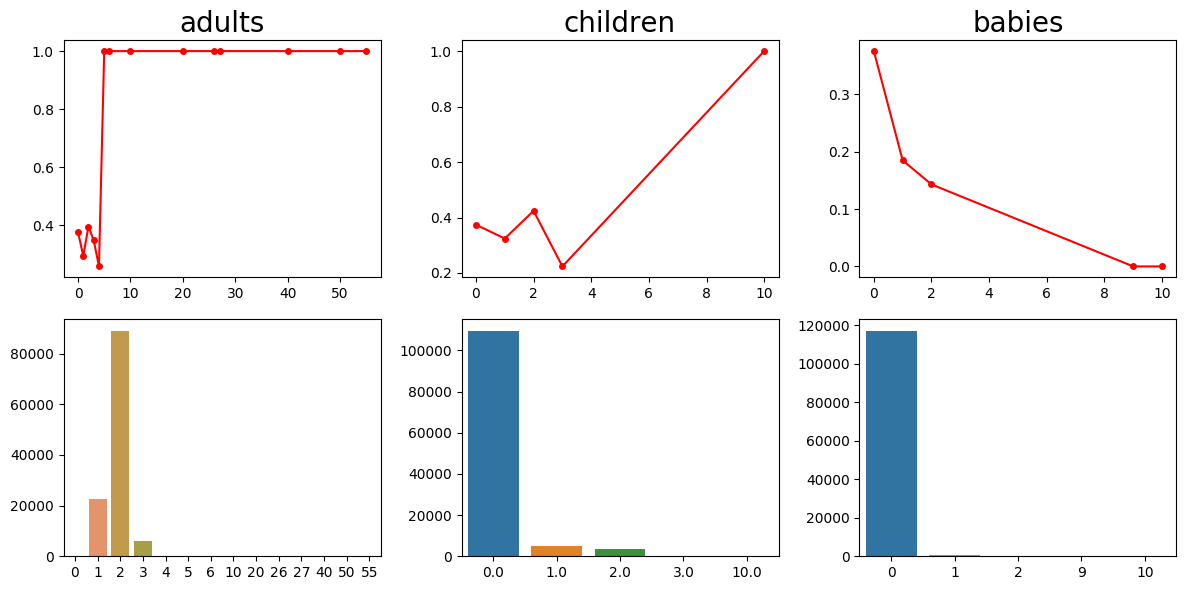

In [9]:
# 查看预定人数与取消预定的关系
plt.figure(figsize=(12, 6))
index = 0
for people in ['adults', 'children', 'babies']:
    index += 1
    plt.subplot(2, 3, index)
    plt.plot(data.groupby(people)['is_canceled'].mean(),
             'ro-',
             ms=4)
    plt.title(people, fontsize=20)
    plt.subplot(2, 3, index + 3)
    people_stats = data[people].value_counts()
    sns.barplot(people_stats.index, people_stats.values)
plt.tight_layout()
plt.show()

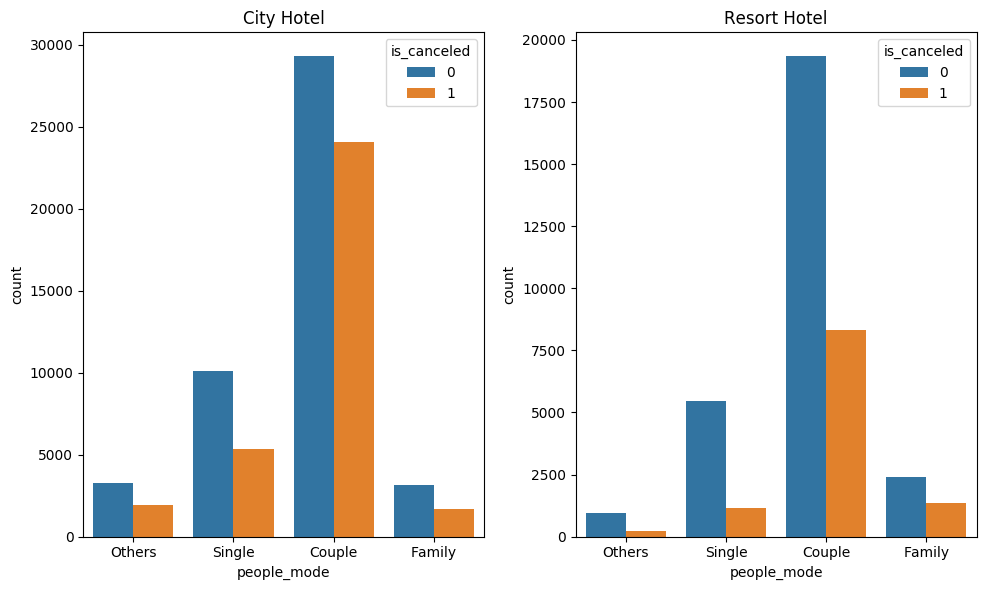

In [10]:
# 入住人数模式分析
# 单人
single = (data.adults == 1) & (data.children == 0) & (data.babies == 0)
# 双人
couple = (data.adults == 2) & (data.children == 0) & (data.babies == 0)
# 家庭
family = (data.adults >= 2) & (data.children > 0) | (data.babies > 0)

data['people_mode'] = single.astype(int) + couple.astype(int) * 2 + family.astype(int) * 3
plt.figure(figsize=(10,6))
index=1
for hotel_kind in ['City Hotel','Resort Hotel']:
    plt.subplot(1,2,index)
    index+=1
    sns.countplot(x='people_mode',
              hue='is_canceled',
              data=data[data.hotel == hotel_kind])
    plt.xticks([0, 1, 2, 3], ['Others', 'Single', 'Couple', 'Family'])
    plt.title(hotel_kind)
plt.tight_layout()
plt.show()

Text(0.5,1,'Uncanceled')

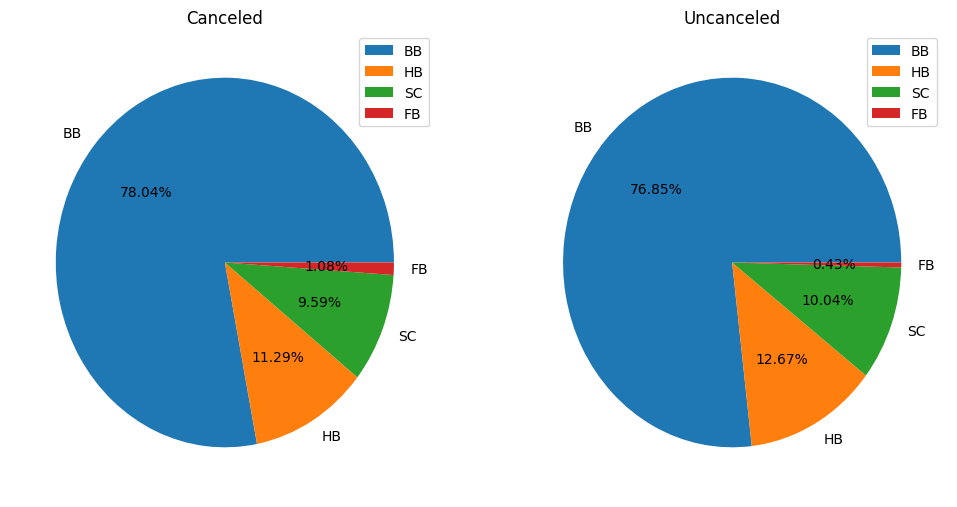

In [11]:
# 查看餐食类型与取消预订的关系
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.pie(data[data['is_canceled'] == 1].meal.value_counts(),
        labels=data[data['is_canceled'] == 1].meal.value_counts().index,
        autopct="%.2f%%")
plt.legend(loc=1)
plt.title('Canceled')
plt.subplot(122)
plt.pie(data[data['is_canceled'] == 0].meal.value_counts(),
        labels=data[data['is_canceled'] == 0].meal.value_counts().index,
        autopct="%.2f%%")
plt.legend(loc=1)
plt.title('Uncanceled')

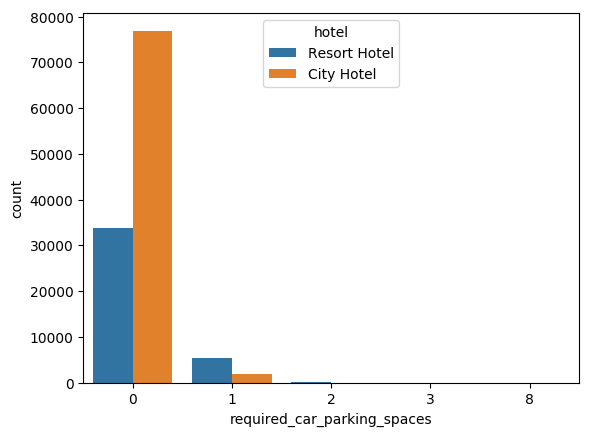

In [12]:
# 车位需求统计
sns.countplot(x='required_car_parking_spaces',hue='hotel',data=data)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0,0.5,'Cancellation rate')

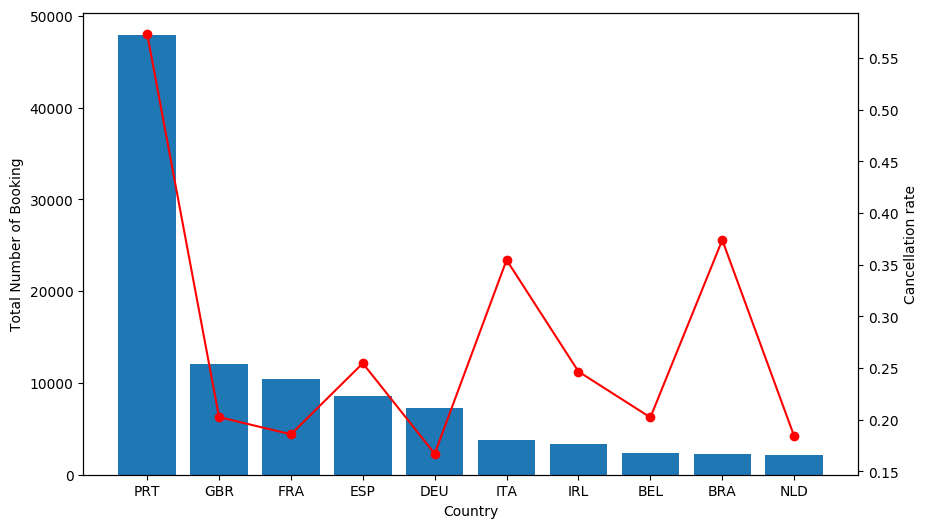

In [13]:
# 查看不同国家订单取消率
# 选取预定数前10的国家/地区
countries_10 = list(
    data.groupby('country').size().sort_values(ascending=False).head(10).index)
data[data.country.isin(countries_10)].shape[0] / data.shape[0]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.xticks(range(10), countries_10)
ax1.bar(
    range(10), data[data.country.isin(countries_10)].groupby('country').size().sort_values(ascending=False))
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Number of Booking')
ax2.plot(
    range(10),
    data[data.country.isin(countries_10)].groupby('country')['is_canceled'].mean().loc[countries_10], 'ro-')
ax2.set_ylabel('Cancellation rate')

Text(0.5,0,'Previous Un-Cancellations')

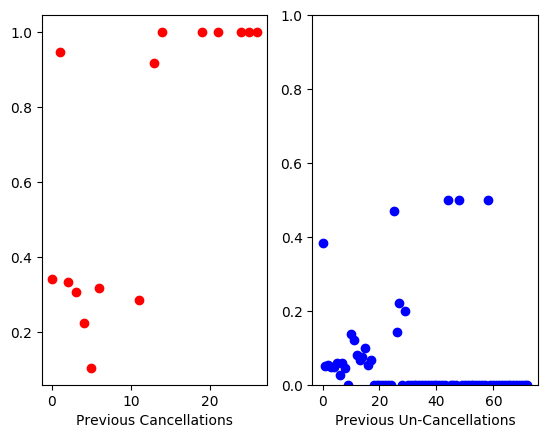

In [14]:
# 查看客户预定历史与取消订单的关系
# 是否回头客
tick_label = ['New Guest', 'Repeated Guest']
sns.countplot(x='is_repeated_guest', hue='is_canceled', data=data)
plt.xticks([0, 1], tick_label)

# 之前取消预定次数
plt.subplot(121)
plt.plot(data.groupby('previous_cancellations')['is_canceled'].mean(),
         'ro')
plt.xlabel('Previous Cancellations')
# 之前未取消预定次数
plt.subplot(122)
plt.plot(data.groupby('previous_bookings_not_canceled')['is_canceled'].mean(),
         'bo')
plt.ylim(0, 1)
plt.xlabel('Previous Un-Cancellations')

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0,0.5,'Cancellation rate')

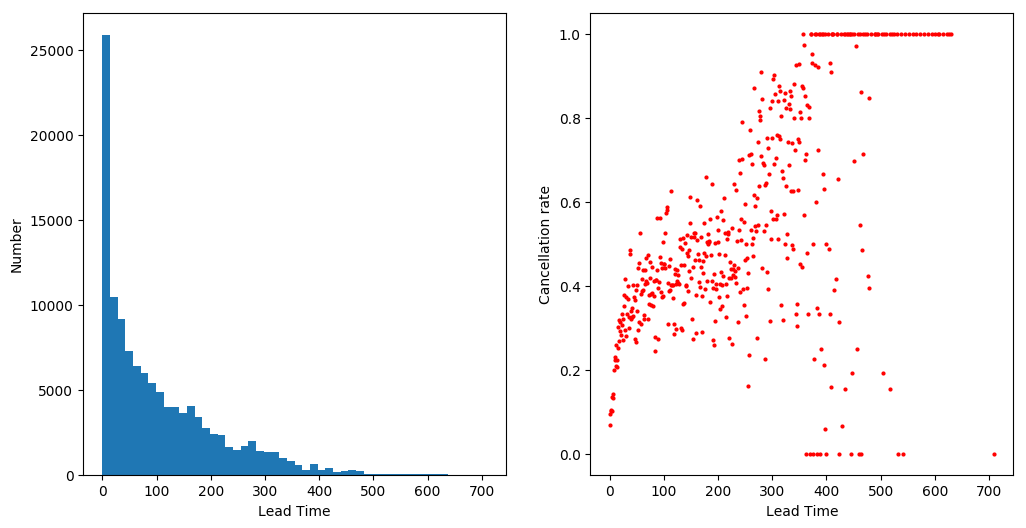

In [15]:
# 提前预定时长的分布情况
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(data['lead_time'], bins=50)
plt.xlabel('Lead Time')
plt.ylabel('Number')
# 提前预定时长对取消的影响
plt.subplot(122)
plt.plot(data.groupby('lead_time')['is_canceled'].mean().index,
         data.groupby('lead_time')['is_canceled'].mean(),
         'ro',
         markersize=2)
plt.xlabel('Lead Time')
plt.ylabel('Cancellation rate')

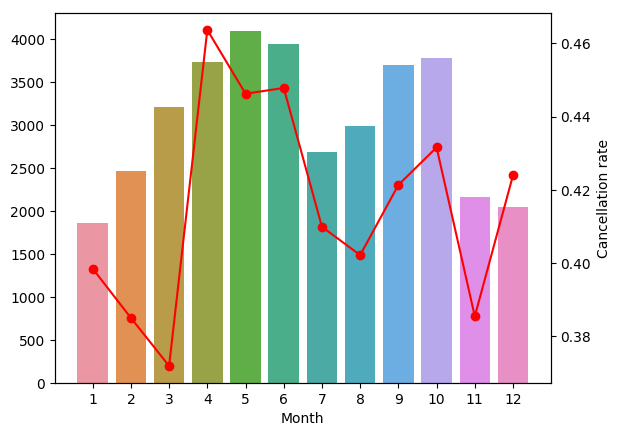

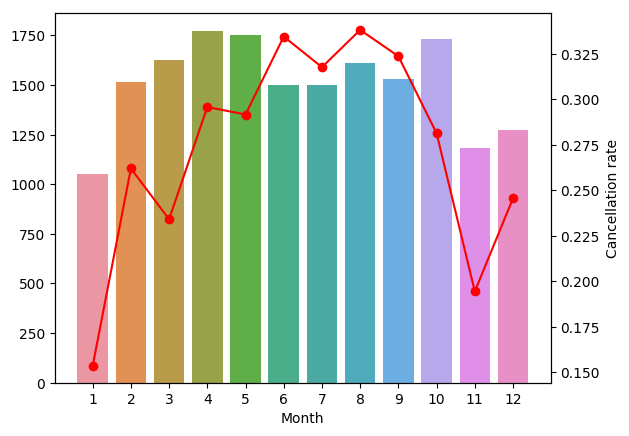

In [16]:
# 不同月份预定和取消情况
ordered_months = [
    "January", "February", "March", "April", "May", "June", "July", "August",
    "September", "October", "November", "December"
]

for hotel in ['City Hotel','Resort Hotel']:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    data_hotel=data[data.hotel==hotel]
    monthly = data_hotel.groupby('arrival_date_month').size()
    monthly /= 2
    monthly.loc[['July', 'August']] = monthly.loc[['July', 'August']] * 2 / 3
    sns.barplot(list(range(1, 13)), monthly[ordered_months], ax=ax1)
    ax2.plot(
    range(12), data_hotel.groupby('arrival_date_month')
    ['is_canceled'].mean()[ordered_months].values, 'ro-')
    ax1.set_xlabel('Month')
    ax2.set_ylabel('Cancellation rate')

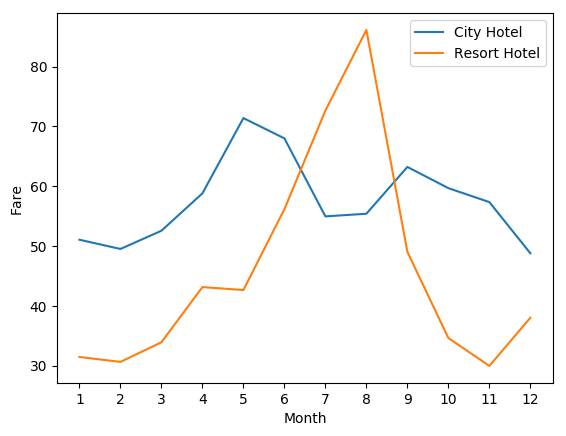

In [17]:
# 不同酒店人均价格波动
# 人均价格(不考虑babies)
data['adr_per_person'] = data['adr'] / (data['adults'] + data['children'])
plt.plot(data[data.hotel == 'City Hotel'].groupby('arrival_date_month')
         ['adr_per_person'].mean()[ordered_months],
         label='City Hotel')
plt.plot(data[data.hotel == 'Resort Hotel'].groupby('arrival_date_month')
         ['adr_per_person'].mean()[ordered_months],
         label='Resort Hotel')
plt.xlabel('Month')
plt.ylabel('Fare')
plt.xticks(np.arange(12), range(1, 13))
plt.legend()

In [18]:
# 周末和工作日取消率
# 工作日
data[data['stays_in_weekend_nights'] == 0]['is_canceled'].mean()

0.3814281227918662

In [19]:
# 周末
data[data['stays_in_weekend_nights'] != 0]['is_canceled'].mean()

0.36765757178601216

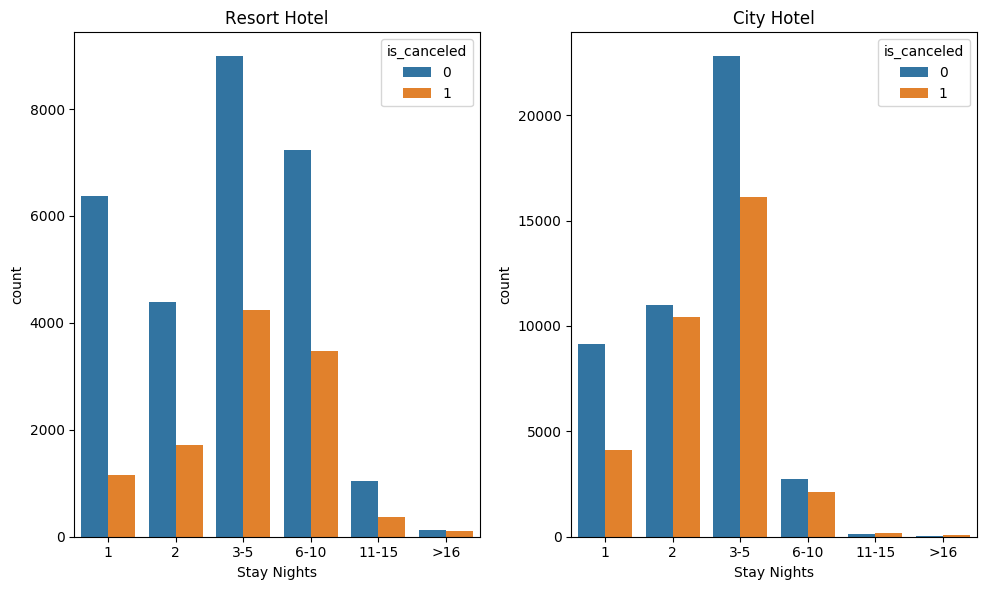

In [20]:
# 预定入住时长对取消预定的影响
data['stay_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
# 分布过散，进行数据分桶
bin = [0, 1, 2, 5, 10, 15, np.inf]
data['stay_nights_bin'] = pd.cut(data['stay_nights'], bin,
                                 labels=['1', '2', '3-5', '6-10', '11-15', '>16'])
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(x='stay_nights_bin', hue='is_canceled',
              data=data[data['hotel'] == 'Resort Hotel'])
plt.xlabel('Stay Nights')
plt.title('Resort Hotel')
plt.subplot(122)
sns.countplot(x='stay_nights_bin', hue='is_canceled',
              data=data[data['hotel'] == 'City Hotel'])
plt.xlabel('Stay Nights')
plt.title('City Hotel')
plt.tight_layout()
plt.show()

Text(0,0.5,'Rate')

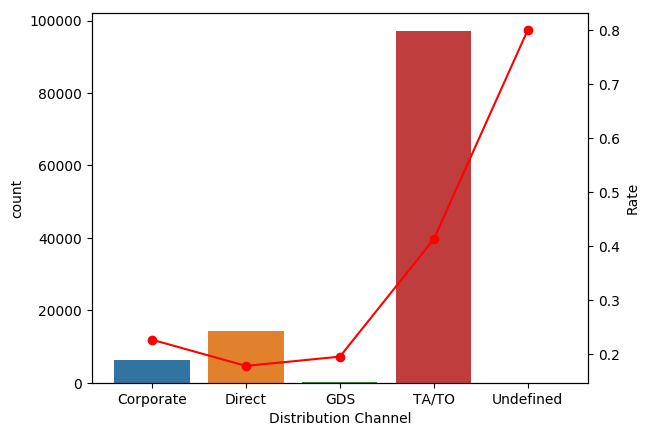

In [21]:
# 预定渠道对取消率的影响
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.countplot(
    x=data['distribution_channel'],
    order=data.groupby('distribution_channel')['is_canceled'].mean().index,
    ax=ax1)
ax1.set_xlabel('Distribution Channel')
ax2.plot(data.groupby('distribution_channel')['is_canceled'].mean(), 'ro-')
ax2.set_ylabel('Rate')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118092 entries, 2 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           118092 non-null  object  
 1   is_canceled                     118092 non-null  int64   
 2   lead_time                       118092 non-null  int64   
 3   arrival_date_year               118092 non-null  int64   
 4   arrival_date_month              118092 non-null  object  
 5   arrival_date_week_number        118092 non-null  int64   
 6   arrival_date_day_of_month       118092 non-null  int64   
 7   stays_in_weekend_nights         118092 non-null  int64   
 8   stays_in_week_nights            118092 non-null  int64   
 9   adults                          118092 non-null  int64   
 10  children                        118092 non-null  float64 
 11  babies                          118092 non-null  int64   
 12  me

In [23]:
# 构建预测模型
num = [
    'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
    'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'agent', 'required_car_parking_spaces',
    'total_of_special_requests', 'adr', 'adr_per_person'
]

cat = [
    'hotel', 'arrival_date_month', 'meal', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'deposit_type',
    'customer_type'
]

target = ['is_canceled']


ref = num+cat+target
train = data[ref]
#处理类别变量
train[cat]=train[cat].apply(LabelEncoder().fit_transform)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


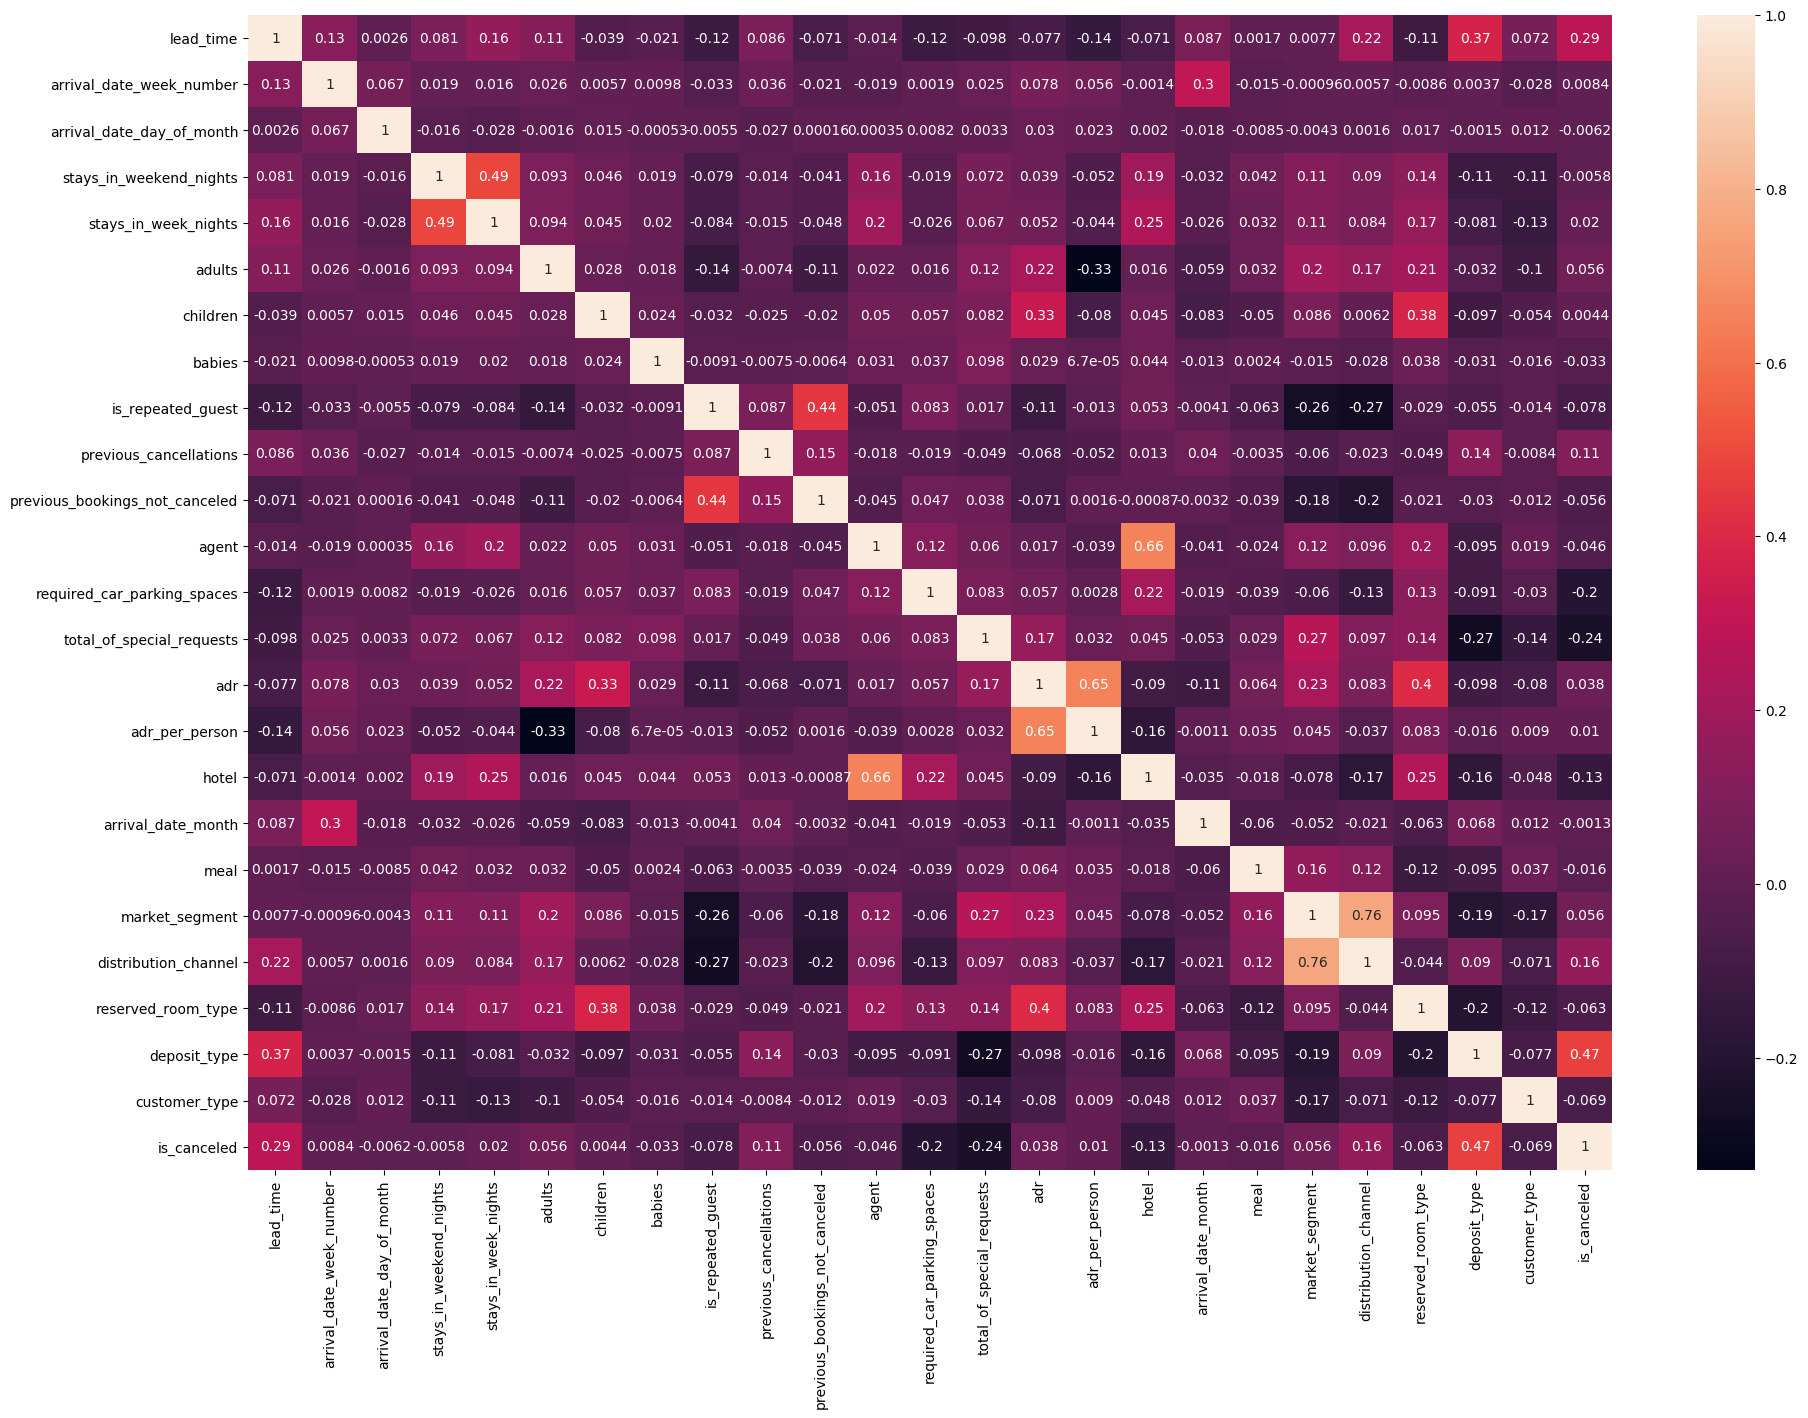

In [24]:
# 查看各列与取消预订的相关系数
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(train.corr(), annot=True)

In [25]:
# 分离特征变量和目标变量
X = train.drop(['is_canceled'], axis=1)
y = train['is_canceled']
#划分测试集和训练集
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=0)

# 特征缩放
std_sca = StandardScaler()
X = std_sca.fit_transform(X)

#岭回归方法
r1=RidgeClassifier(random_state=42)  
r1.fit(X_train,y_train)
print(r1.score(X_train,y_train))
print(r1.score(X_test,y_test))

0.7664306924544705
0.7660806828574331


In [26]:
#logistic回归方法
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7505334823696779
0.7512786640924025


In [27]:
#线性SVM方法
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=42))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7866296333931737
0.7857602547166616


In [28]:
#SGD方法
clf = make_pipeline(StandardScaler(),SGDClassifier(n_jobs=-1, random_state=42))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.7683275186577696
0.7686210750939945


In [29]:
#决策树方法
clf = make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=42))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9904932877191794
0.8231209565423568


In [30]:
#随机森林方法
clf = make_pipeline(StandardScaler(),RandomForestClassifier(n_jobs=-1, random_state=42))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9904819970870169
0.8649188768079125


从上面不同模型在训练集和测试集上的表现来看，决策树和随机森林的拟合效果比较好。

下面举一个实例，是如何使用随机森林模型对某组样本数据进行预测的。


In [31]:
from sklearn import metrics
#选择待预测样本
pre_x=X[1:2,]
#相应的真实值
true_y=y[2]
#预测结果
pre_y=clf.predict(pre_x)
print(true_y)
print(pre_y)

0
[0]



可以看到预测结果和真实结果相同，所选模型可以较好的完成预测任务

# **特征工程**

下边用random forest 的feature_importance 来筛选特征

AUC: 0.8450
ACC: 0.8655
Recall: 0.7636
F1-score: 0.8093
Precesion: 0.8608
Average_Precesion: 0.7456
混淆矩阵为：
[[17131  1362]
 [ 2608  8422]]
准确率,召回率以及F1分数如下:
(0.8607931316434996, 0.7635539437896646, 0.809262996060344, None)


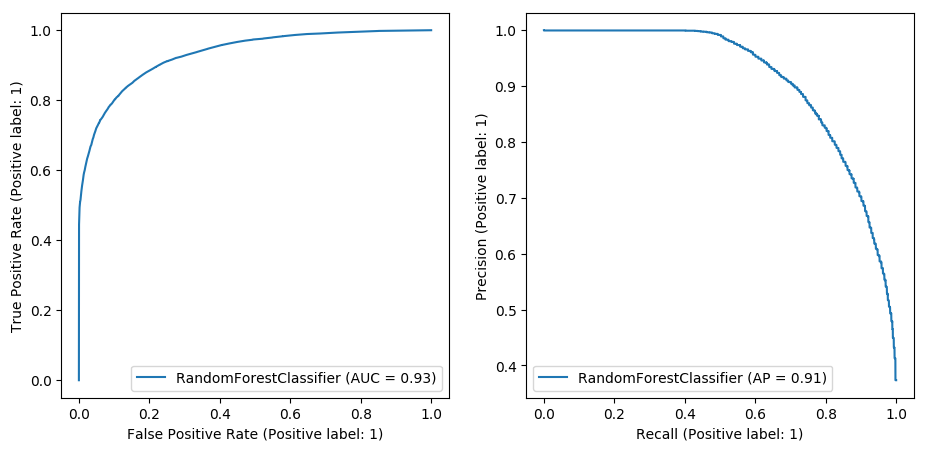

In [32]:
#随机森林
#模型参数设置
forest = RandomForestClassifier(n_jobs=-1, random_state=42)#使用CPU全部内核，随机种子=42
#模型拟合
forest.fit(X_train,y_train)
#模型预测
y_pred_rf=forest.predict(X_test)
#评价指标
print ('AUC: %.4f' % metrics.roc_auc_score(y_test,y_pred_rf))
print ('ACC: %.4f' % metrics.accuracy_score(y_test,y_pred_rf))
print ('Recall: %.4f' % metrics.recall_score(y_test,y_pred_rf))
print ('F1-score: %.4f' %metrics.f1_score(y_test,y_pred_rf))
print ('Precesion: %.4f' %metrics.precision_score(y_test,y_pred_rf))
print ('Average_Precesion: %.4f' %metrics.average_precision_score(y_test,y_pred_rf))

print('混淆矩阵为：')
print(metrics.confusion_matrix(y_test,y_pred_rf))

rf=np.array([metrics.roc_auc_score(y_test,y_pred_rf),
            metrics.accuracy_score(y_test,y_pred_rf),
            metrics.recall_score(y_test,y_pred_rf),
            metrics.f1_score(y_test,y_pred_rf),
            metrics.precision_score(y_test,y_pred_rf),
            metrics.average_precision_score(y_test,y_pred_rf)])
print('准确率,召回率以及F1分数如下:')
print(precision_recall_fscore_support(y_test, y_pred_rf,average='binary'))
#print(forest.score(X_test,y_test))
fig, [ax_roc, ax_pr] = plt.subplots(1, 2, figsize=(11, 5))
plot_roc_curve(forest, X_test, y_test,ax=ax_roc)
plot_precision_recall_curve(forest, X_test, y_test, ax=ax_pr)
plt.show() 

In [33]:
feature_list=list(train.columns.drop(['is_canceled']))
importances = list(forest.feature_importances_)  
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)] 
feature_importances=pd.DataFrame(feature_importances,columns=('features','importance'))
feature_importances.sort_values(by=['importance'],ascending = [False],inplace=True)
print(feature_importances)

                          features  importance
0                        lead_time        0.15
22                    deposit_type        0.13
15                  adr_per_person        0.08
14                             adr        0.08
2        arrival_date_day_of_month        0.07
13       total_of_special_requests        0.07
1         arrival_date_week_number        0.06
9           previous_cancellations        0.05
11                           agent        0.05
4             stays_in_week_nights        0.04
19                  market_segment        0.04
17              arrival_date_month        0.03
23                   customer_type        0.03
3          stays_in_weekend_nights        0.03
21              reserved_room_type        0.02
12     required_car_parking_spaces        0.02
16                           hotel        0.01
6                         children        0.01
18                            meal        0.01
5                           adults        0.01
20           

将特征重要度小于等于0.01的特征剔除，重新构建模型

In [34]:
data=train.drop(columns=['hotel','children','meal','adults','distribution_channel','previous_bookings_not_canceled','is_repeated_guest','babies'])

In [35]:
feature=list(data.columns.drop(['is_canceled']))
X_train,X_test,y_train,y_test=train_test_split(data[feature],data['is_canceled'],test_size=0.3,random_state=0)

# **logistic 回归**

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC: 0.7139
ACC: 0.7555
Recall: 0.5462
F1-score: 0.6267
Precesion: 0.7351
Average_Precesion: 0.5720
混淆矩阵为：
[[19497  2620]
 [ 6041  7270]]
准确率，召回率以及F1度量如下：
(0.7350859453993933, 0.5461648260836902, 0.6266971251239171, None)


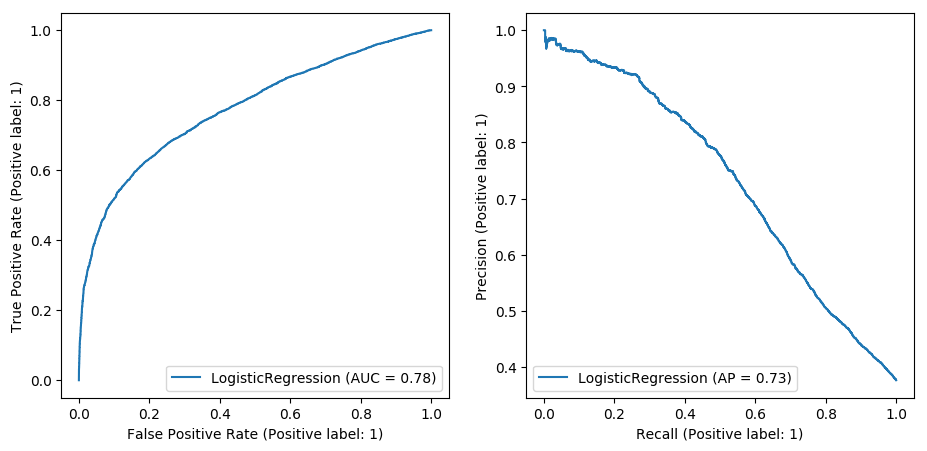

In [36]:
#logistic回归方法
#参数设置
model=LogisticRegression()
#模型拟合
model.fit(X_train,y_train)
#模型预测
y_pred_lr=model.predict(X_test)
#评价指标
print ('AUC: %.4f' % metrics.roc_auc_score(y_test,y_pred_lr))
print ('ACC: %.4f' % metrics.accuracy_score(y_test,y_pred_lr))
print ('Recall: %.4f' % metrics.recall_score(y_test,y_pred_lr))
print ('F1-score: %.4f' %metrics.f1_score(y_test,y_pred_lr))
print ('Precesion: %.4f' %metrics.precision_score(y_test,y_pred_lr))
print ('Average_Precesion: %.4f' %metrics.average_precision_score(y_test,y_pred_lr))

print('混淆矩阵为：')
print(metrics.confusion_matrix(y_test,y_pred_lr))

lr=np.array([metrics.roc_auc_score(y_test,y_pred_lr),
            metrics.accuracy_score(y_test,y_pred_lr),
            metrics.recall_score(y_test,y_pred_lr),
            metrics.f1_score(y_test,y_pred_lr),
            metrics.precision_score(y_test,y_pred_lr),
            metrics.average_precision_score(y_test,y_pred_lr)])
print('准确率，召回率以及F1度量如下：')
print(precision_recall_fscore_support(y_test, y_pred_lr,average='binary'))
#print('测试集得分：',lr.score(X_test,y_test))
fig, [ax_roc, ax_pr] = plt.subplots(1, 2, figsize=(11, 5))
plot_roc_curve(model, X_test, y_test,ax=ax_roc)
plot_precision_recall_curve(model, X_test, y_test, ax=ax_pr)
plt.show() 

# **random forest 模型**

AUC: 0.8427
ACC: 0.8643
Recall: 0.7557
F1-score: 0.8071
Precesion: 0.8660
Average_Precesion: 0.7462
混淆矩阵为：
[[20561  1556]
 [ 3252 10059]]
准确率，召回率以及F1分数如下：
(0.8660352991820921, 0.7556907820599504, 0.807109042766589, None)


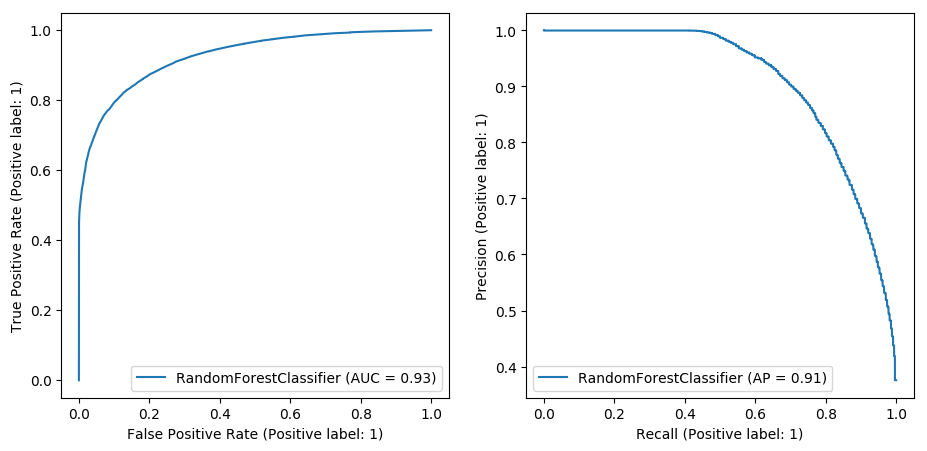

In [37]:
#随机森林
#模型参数设置
forest = RandomForestClassifier(n_jobs=-1, random_state=42)
#模型拟合
forest.fit(X_train,y_train)
#模型预测
y_pred_rf=forest.predict(X_test)
#评价指标
print ('AUC: %.4f' % metrics.roc_auc_score(y_test,y_pred_rf))
print ('ACC: %.4f' % metrics.accuracy_score(y_test,y_pred_rf))
print ('Recall: %.4f' % metrics.recall_score(y_test,y_pred_rf))
print ('F1-score: %.4f' %metrics.f1_score(y_test,y_pred_rf))
print ('Precesion: %.4f' %metrics.precision_score(y_test,y_pred_rf))
print ('Average_Precesion: %.4f' %metrics.average_precision_score(y_test,y_pred_rf))

print('混淆矩阵为：')
print(metrics.confusion_matrix(y_test,y_pred_rf))

rf=np.array([metrics.roc_auc_score(y_test,y_pred_rf),
            metrics.accuracy_score(y_test,y_pred_rf),
            metrics.recall_score(y_test,y_pred_rf),
            metrics.f1_score(y_test,y_pred_rf),
            metrics.precision_score(y_test,y_pred_rf),
            metrics.average_precision_score(y_test,y_pred_rf)])
print('准确率，召回率以及F1分数如下：')
print(precision_recall_fscore_support(y_test, y_pred_rf,average='binary'))
#print(forest.score(X_test,y_test))
fig, [ax_roc, ax_pr] = plt.subplots(1, 2, figsize=(11, 5))
plot_roc_curve(forest, X_test, y_test,ax=ax_roc)
plot_precision_recall_curve(forest, X_test, y_test, ax=ax_pr)
plt.show() 

# **xgboost 模型**

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 0.8095
ACC: 0.7884
Recall: 0.8944
F1-score: 0.7605
Precesion: 0.6615
Average_Precesion: 0.6313
混淆矩阵为：
[[16025  6092]
 [ 1406 11905]]


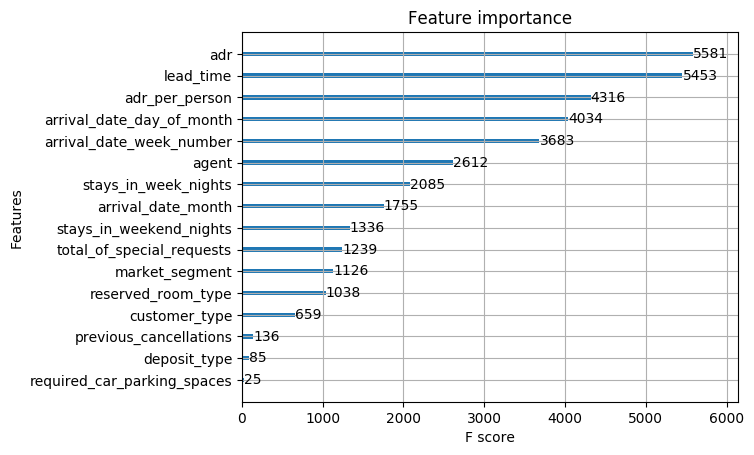

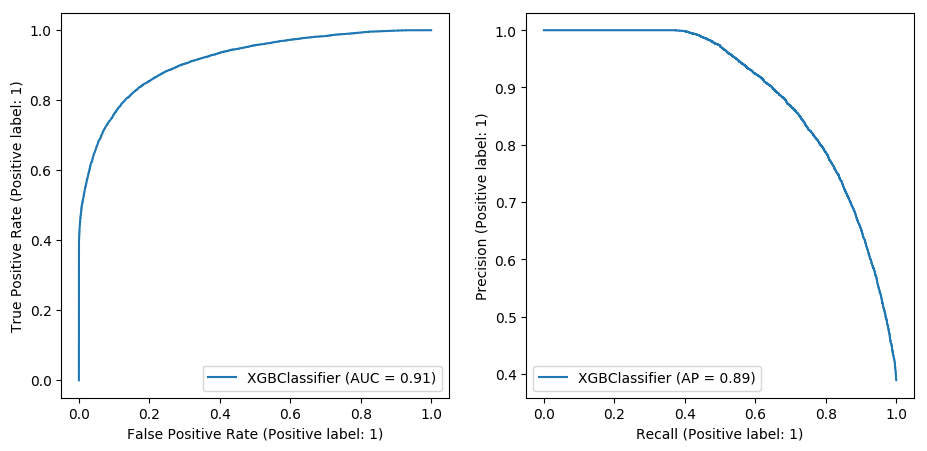

In [38]:
#xgboost的参考资料见https://www.cnblogs.com/harekizgel/p/7683803.html和https://blog.csdn.net/zhong_ddbb/article/details/107281759

import xgboost as xgb
# 初始化模型
model = xgb.XGBClassifier(n_estimators=200,max_depth=9,learning_rate=0.3,booster='gbtree', subsample=0.7, colsample_bytree=0.7,scale_pos_weight=10)
#scale_pos_weight是样本集为不平衡数据集时给样本设置权重的参数

# 拟合模型
model.fit(X_train, y_train)

# 使用模型预测
y_pred_xgb = model.predict(X_test)

# 评价标准
from sklearn import metrics
print ('AUC: %.4f' % metrics.roc_auc_score(y_test,y_pred_xgb))
print ('ACC: %.4f' % metrics.accuracy_score(y_test,y_pred_xgb))
print ('Recall: %.4f' % metrics.recall_score(y_test,y_pred_xgb))
print ('F1-score: %.4f' %metrics.f1_score(y_test,y_pred_xgb))
print ('Precesion: %.4f' %metrics.precision_score(y_test,y_pred_xgb))
print ('Average_Precesion: %.4f' %metrics.average_precision_score(y_test,y_pred_xgb))

print('混淆矩阵为：')
print(metrics.confusion_matrix(y_test,y_pred_xgb))

xgb=np.array([metrics.roc_auc_score(y_test,y_pred_xgb),
            metrics.accuracy_score(y_test,y_pred_xgb),
            metrics.recall_score(y_test,y_pred_xgb),
            metrics.f1_score(y_test,y_pred_xgb),
            metrics.precision_score(y_test,y_pred_xgb),
            metrics.average_precision_score(y_test,y_pred_xgb)])
#特征重要性排序
from xgboost import plot_importance as plot_importance_xgb
plot_importance_xgb(model)
plt.show()
fig, [ax_roc, ax_pr] = plt.subplots(1, 2, figsize=(11, 5))
plot_roc_curve(model, X_test, y_test,ax=ax_roc)
plot_precision_recall_curve(model, X_test, y_test, ax=ax_pr)
plt.show() 

# **lightgbm 模型**

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
AUC: 0.8107
ACC: 0.8416
Recall: 0.6866
F1-score: 0.7651
Precesion: 0.8638
Average_Precesion: 0.7108
混淆矩阵为：
[[20676  1441]
 [ 4172  9139]]


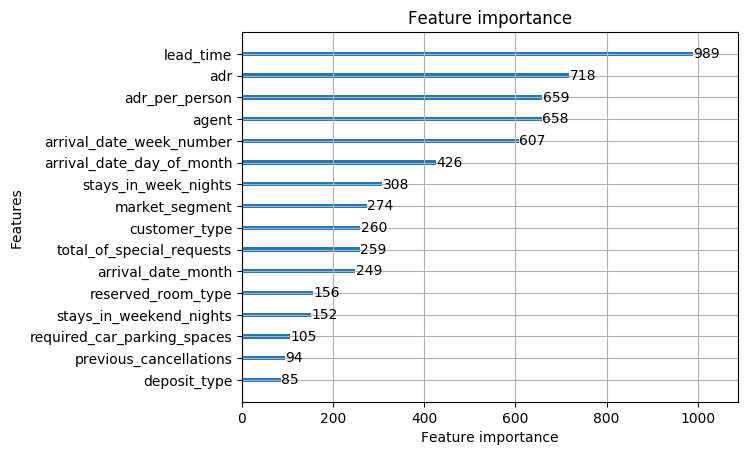

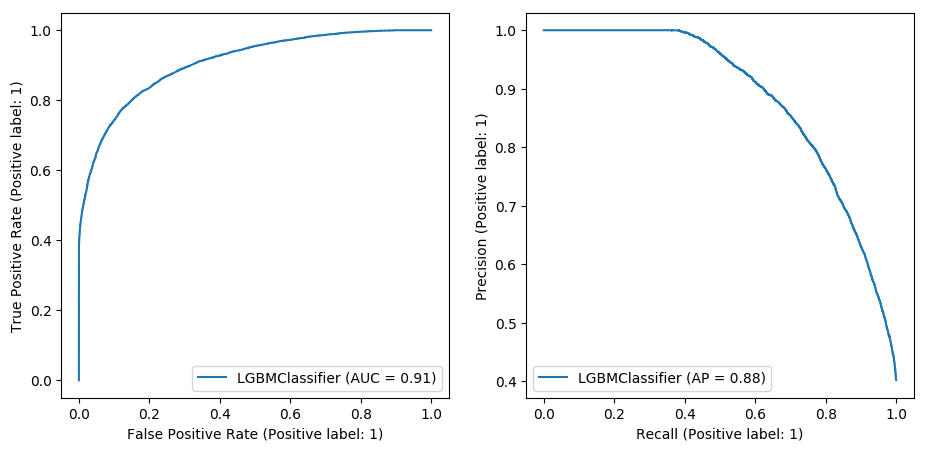

In [39]:
#lightgbm的参考资料见https://blog.csdn.net/zhong_ddbb/article/details/107285482?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522162281374016780262553676%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=162281374016780262553676&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_v2~rank_v29-6-107285482.pc_search_result_before_js&utm_term=lightgbm%E6%95%99%E7%A8%8B&spm=1018.2226.3001.4187
#和https://www.cnblogs.com/bjwu/p/9307344.html
from lightgbm import LGBMClassifier
model = LGBMClassifier(
    max_depth=9,
    learning_rate=0.1,
    n_estimators=200, # 使用多少个弱分类器
    objective='binary',
    booster='gbtree',
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,
    seed=0 # 随机数种子
)
model.fit(X_train,y_train)

# 对测试集进行预测
y_pred_lgb = model.predict(X_test)
# 评价标准
print ('AUC: %.4f' % metrics.roc_auc_score(y_test,y_pred_lgb))
print ('ACC: %.4f' % metrics.accuracy_score(y_test,y_pred_lgb))
print ('Recall: %.4f' % metrics.recall_score(y_test,y_pred_lgb))
print ('F1-score: %.4f' %metrics.f1_score(y_test,y_pred_lgb))
print ('Precesion: %.4f' %metrics.precision_score(y_test,y_pred_lgb))
print ('Average_Precesion: %.4f' %metrics.average_precision_score(y_test,y_pred_lgb))

print('混淆矩阵为：')
print(metrics.confusion_matrix(y_test,y_pred_lgb))

lgb=np.array([metrics.roc_auc_score(y_test,y_pred_lgb),
            metrics.accuracy_score(y_test,y_pred_lgb),
            metrics.recall_score(y_test,y_pred_lgb),
            metrics.f1_score(y_test,y_pred_lgb),
            metrics.precision_score(y_test,y_pred_lgb),
            metrics.average_precision_score(y_test,y_pred_lgb)])
#特征重要性排序
from lightgbm import plot_importance as plot_importance_lgb
plot_importance_lgb(model)
plt.show()
fig, [ax_roc, ax_pr] = plt.subplots(1, 2, figsize=(11, 5))
plot_roc_curve(model, X_test, y_test,ax=ax_roc)
plot_precision_recall_curve(model, X_test, y_test, ax=ax_pr)
plt.show() 

# **catboost 模型**

In [43]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple flaml[catboost]

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple

[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


AUC: 0.8370
ACC: 0.8555
Recall: 0.7625
F1-score: 0.7986
Precesion: 0.8384
Average_Precesion: 0.7285
混淆矩阵为：
[[20160  1957]
 [ 3161 10150]]
                       features  importance
0                     lead_time      12.374
14                 deposit_type       9.214
2     arrival_date_day_of_month       8.892
10               adr_per_person       7.760
1      arrival_date_week_number       7.381
9                           adr       7.374
6                         agent       6.569
8     total_of_special_requests       6.281
4          stays_in_week_nights       6.121
3       stays_in_weekend_nights       4.897
11           arrival_date_month       4.848
7   required_car_parking_spaces       4.561
12               market_segment       4.529
5        previous_cancellations       3.316
15                customer_type       3.116
13           reserved_room_type       2.768


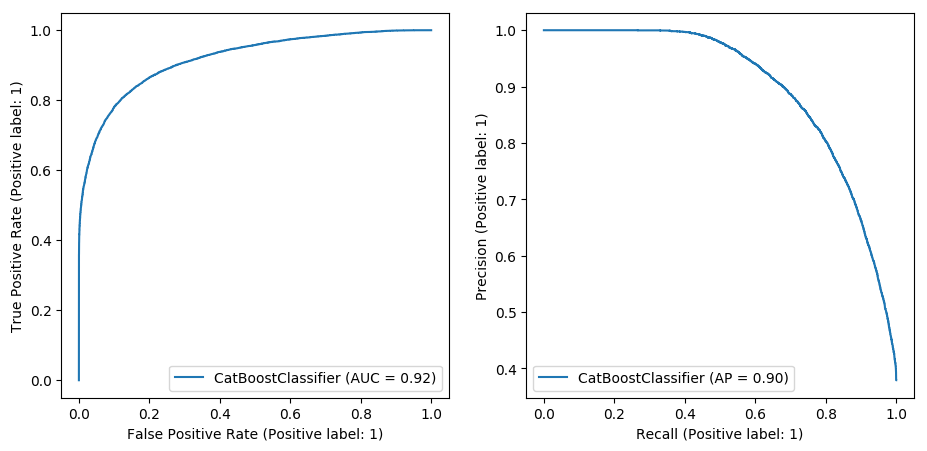

In [44]:
#catboost的参考资料见https://www.biaodianfu.com/catboost.html#CatBoost%E4%BD%BF%E7%94%A8%E7%A4%BA%E4%BE%8B

import catboost as cb

#模型参数配置
model = cb.CatBoostClassifier(iterations=1000, depth=10, learning_rate=0.3, loss_function='Logloss',logging_level='Silent')
#logging_level='Silent'控制输出日志信息

#模型拟合
model.fit(X_train, y_train,)#cat_features=[0,2,5]用来标记分类特征

# 使用模型预测
y_pred_cab = model.predict(X_test)#预测类别
#y_pred_probs = model.predict_proba(X_test)#预测类别的概率

# 评价标准
print ('AUC: %.4f' % metrics.roc_auc_score(y_test,y_pred_cab))
print ('ACC: %.4f' % metrics.accuracy_score(y_test,y_pred_cab))
print ('Recall: %.4f' % metrics.recall_score(y_test,y_pred_cab))
print ('F1-score: %.4f' %metrics.f1_score(y_test,y_pred_cab))
print ('Precesion: %.4f' %metrics.precision_score(y_test,y_pred_cab))
print ('Average_Precesion: %.4f' %metrics.average_precision_score(y_test,y_pred_cab))

print('混淆矩阵为：')
print(metrics.confusion_matrix(y_test,y_pred_cab))

cab=np.array([metrics.roc_auc_score(y_test,y_pred_cab),
            metrics.accuracy_score(y_test,y_pred_cab),
            metrics.recall_score(y_test,y_pred_cab),
            metrics.f1_score(y_test,y_pred_cab),
            metrics.precision_score(y_test,y_pred_cab),
            metrics.average_precision_score(y_test,y_pred_cab)])
#特征重要性排序
feature_list=list(data.columns.drop(['is_canceled']))
importances_list = list(model.feature_importances_)  
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances_list)] 
feature_importances=pd.DataFrame(feature_importances,columns=('features','importance'))
feature_importances.sort_values(by=['importance'],ascending = [False],inplace=True)
print(feature_importances)

fig, [ax_roc, ax_pr] = plt.subplots(1, 2, figsize=(11, 5))
plot_roc_curve(model, X_test, y_test,ax=ax_roc)
plot_precision_recall_curve(model, X_test, y_test, ax=ax_pr)
plt.show() 

In [45]:
df = pd.DataFrame(np.vstack((lr, rf, xgb,lgb,cab)), 
                 index=['logisticRegression','RandomForest','xgboost','lightgbm','catboost'],
                 columns=['AUC','Accuracy','Recall','F1-score','Precesion','Average_Precesion'])
df

,AUC,Accuracy,Recall,F1-score,Precesion,Average_Precesion
logisticRegression,0.713852,0.755532,0.546165,0.626697,0.735086,0.571993
RandomForest,0.842669,0.864288,0.755691,0.807109,0.866035,0.746247
xgboost,0.809464,0.788359,0.894373,0.760508,0.661499,0.631313
lightgbm,0.810711,0.841566,0.686575,0.765058,0.863800,0.710823
catboost,0.837022,0.855538,0.762527,0.798647,0.838358,0.728494
